In [1]:
import requests
from requests.auth import HTTPBasicAuth
import json
import pandas as pd

In [2]:
import os
api_key = os.environ.get("PRIVATE_RIVERZONE_API_KEY")

In [3]:
def get_latest_river_flow(n_days=5, station_id='b49e45e5-73ce-3e0d-ade8-945e713307c5'):
    # URL for Dranse @ Bioge
    url = f"https://api.riverzone.eu/v2/stations/{station_id}/readings"
    params = {'key': api_key,
              'from': 60 * 24 * n_days, 'to': 60 * 24 * n_days}
    with requests.get(url=url, params=params) as req:
        readings_json = req.json()
    flow_df = pd.DataFrame(readings_json['readings']['m3s'])
    flow_df['ts'] = flow_df['ts'].apply(pd.to_datetime, origin='unix', unit='s')
    return flow_df

In [4]:
flow_df = get_latest_river_flow(n_days=5)


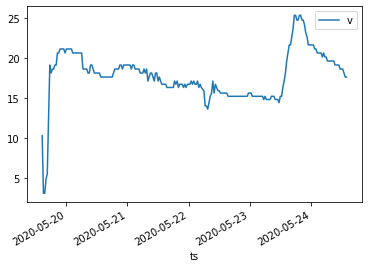

In [5]:
flow_df.plot(x='ts', y='v')

In [245]:
flow_df

,ts,v
0,2020-05-16 11:30:00,25.3
1,2020-05-16 12:00:00,24.7
2,2020-05-16 12:30:00,24.7
3,2020-05-16 13:00:00,24.7
4,2020-05-16 13:30:00,24.7
...,...,...
233,2020-05-21 08:30:00,17.6
234,2020-05-21 09:00:00,18.1
235,2020-05-21 09:30:00,18.1
236,2020-05-21 10:00:00,17.6


In [258]:
print(api_key)

None
